# Исследовательский анализ данных сервиса Яндекс Афиша в Python и проверка гипотез.

Автоор: Ососов Ян

Дата: 11.09.2025

## Цели и Задачи 

По пезультатам выполнения прошлой работы были замечены общие изменения в пользовательском спросе. Цель провести исследовательский анализ данных, который в себя включает: изучение изменений пользовательской активности или пользовательского интереса в связи с сезонностью, в нескольких разрезах, изучить динамику показателей осенью, изучить изменение популярности событий и пользовательской активности осенью 2024 года, а также проверить несколько гипотез относительно активности пользователей мобильных и стационарных устройств.

Для выполнение поставленной цели всю работу удобно разделить на следующие задачи:
- Знакомство с даными
- Предобработка данных
- Ислледовательский анализ
- Статистический анализ

## Описание данных

Для выполнениия данной работы у нас есть данные, с которыми мы познакомились ранее, о бронировании билетов на сервисе Яндекс Афиша за период с 1 июня по 30 октября 2024 года. Они представляют из себя два датасета: `1` и `2`

Первый датасет `1` включает информацию обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных. Поля датасета:

В данные также был добавлен столбец `days_since_prev` с количеством дней с предыдущей покупки для каждого пользователя. Если покупки не было, то данные содержат пропуск.

Второй датасет `2` содержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия. Bз данных исключили фильмы, ведь, как было видно на дашборде, событий такого типа не так много. Датасет содержит такие поля:


Анализ данных в предыдущей части проекта показал, что выручка от заказов представлена в двух валютах — российских рублях и казахстанских тенге. Для удобства решения было бы корректно привести данные к одной валюте, например к российским рублям. Для этого используем датасет `3` с информацией о курсе тенге к российскому рублю за 2024 год. Значения в рублях представлено для 100 тенге. Датасет содержит такие поля:


## Содержание проекта

- Загрузка данных и знакомство с ними
- Предобработка данных и подготовка их к исследованию
- Исследовательский анализ данных
  - Анализ распределения заказов по сегментам и их сезонные изменения
  - Осенняя активность пользователей
  - Популярные события и партнёры
- Статистический анализ данных
  - Проверка первой гипотезы
  - Проверка второй гипотезы
- Общий вывод и рекомендации

## Выполнение проекта 

### Загрузка данных и знакомство с ними

In [1]:
# Исполььзуемыые библиотеки в исследовании
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
df_orders= pd.read_csv('1')
display(df_orders.info())
display(df_orders.head())
display(df_orders.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

None

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


(290849, 14)

In [3]:
df_events= pd.read_csv('2')
display(df_events.info())
display(df_events.head())
display(df_events.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


None

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


(22427, 11)

**Промежуточные выводы**

Данные соответствуют описанию представленному в техническом задании: `1`  имеет размер (290849, 14), `2` -(22427, 11). Названия всех столбцов приведены к типу `snake_case`, пропуски есть только в столбце `days_since_prev`, в целом я думаю работа с пропусками не требуется, сложно сказать сходу о наличиях дубликатов, некоторое типы данных можно оптимизировать, столбцы нектороые нужно привести к нужному типу например столбцы с датой и временем

### Предобработка данных и подготовка их к исследованию

Перед тем как приступим к предобработке, объеденим датасекты по полю `event_id`, для удообства. Т.к. таблица с заказами более приоритетная с точки зрения информации, столбец c выручкой в ней, исполььзуем левостороннее присоедение 

In [4]:
df = df_orders.merge(df_events, on='event_id', how='left')
display(df.info())
display(df.head())
display(df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290849 entries, 0 to 290848
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                290849 non-null  int64  
 1   user_id                 290849 non-null  object 
 2   created_dt_msk          290849 non-null  object 
 3   created_ts_msk          290849 non-null  object 
 4   event_id                290849 non-null  int64  
 5   cinema_circuit          290849 non-null  object 
 6   age_limit               290849 non-null  int64  
 7   currency_code           290849 non-null  object 
 8   device_type_canonical   290849 non-null  object 
 9   revenue                 290849 non-null  float64
 10  service_name            290849 non-null  object 
 11  tickets_count           290849 non-null  int64  
 12  total                   290849 non-null  float64
 13  days_since_prev         268909 non-null  float64
 14  event_name          

None

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4"
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6"
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8"
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8"


(290849, 24)

#### Пропуски

После соединения двух таблиц видим, что в присоединеннной части появились пропуски, это значит что не у каждой транзакции есть соответствующая информация в таблице с мероприятиями

In [5]:
display(df[df['event_name'].isna()]['event_id'].count() / df.shape[0])
display(df[df['event_name'].isna()]['event_id'].count() )

0.0008182940288603364

238

In [6]:
display(df[df['event_name'].isna()]['event_id'].unique())

array([533222, 530296, 532300, 477731, 536716, 246804, 536731, 555671,
       548224, 538260, 534151, 536715, 539336, 553041, 553435, 548062,
       572020, 559840, 505937])

In [7]:
df[df['event_id'] == 533222]

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
62,6493246,002ec276eee9b0b,2024-10-14,2024-10-14 16:27:53,533222,нет,6,rub,mobile,78.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,6493275,002ec276eee9b0b,2024-10-14,2024-10-14 16:22:38,533222,нет,6,rub,mobile,78.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,6493304,002ec276eee9b0b,2024-10-14,2024-10-14 16:29:20,533222,нет,6,rub,mobile,118.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80503,1388927,3ba782cd0a08cf5,2024-06-27,2024-06-27 12:24:09,533222,нет,6,rub,desktop,78.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94472,4564949,44c1c640a242aea,2024-10-17,2024-10-17 22:35:08,533222,нет,6,rub,mobile,157.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158851,1321125,8187dac4be757a0,2024-07-23,2024-07-23 09:31:07,533222,нет,6,rub,mobile,78.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180009,5445882,9266ae37be0ffc2,2024-10-21,2024-10-21 16:56:06,533222,нет,6,rub,desktop,78.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246982,3577847,d4a4c462704d744,2024-07-23,2024-07-23 12:50:54,533222,нет,6,rub,mobile,196.86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246983,3577818,d4a4c462704d744,2024-07-23,2024-07-23 13:02:47,533222,нет,6,rub,mobile,118.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282106,5183577,fa916e688691c4e,2024-06-27,2024-06-27 19:12:03,533222,нет,6,rub,mobile,236.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ну вот информации о мероприяятих нет, в разрезе региона, или типа мероприятия не получится провести анализ для этих столбцов, в сравнении с общим кол-вом строк эти даныые составляют 0.08% что ничтожно и можно удалить эти строки(есть предположение что это связано с удалением информации о фильмах в таблице мероприятий, и не удалении соотв строк в таблице заказов, тогда еще больше уверенности в том что эти строки нам не понадобятся. Удаляем

In [8]:
df = df.dropna(subset=['event_name'])
display(df.info())
display(df.head())
display(df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290611 entries, 0 to 290848
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                290611 non-null  int64  
 1   user_id                 290611 non-null  object 
 2   created_dt_msk          290611 non-null  object 
 3   created_ts_msk          290611 non-null  object 
 4   event_id                290611 non-null  int64  
 5   cinema_circuit          290611 non-null  object 
 6   age_limit               290611 non-null  int64  
 7   currency_code           290611 non-null  object 
 8   device_type_canonical   290611 non-null  object 
 9   revenue                 290611 non-null  float64
 10  service_name            290611 non-null  object 
 11  tickets_count           290611 non-null  int64  
 12  total                   290611 non-null  float64
 13  days_since_prev         268698 non-null  float64
 14  event_name          

None

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4"
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6"
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8"
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8"


(290611, 24)

#### Значения в ключевых столбцах

**Категориальные**

Для начала, категории которые нам точно понадобятся `event_type_main`, `device_type_canonical`, `age_limit`, `region_name`, `organizers`

In [9]:
display(df['event_type_main'].unique())

array(['театр', 'выставки', 'другое', 'стендап', 'концерты', 'спорт',
       'ёлки'], dtype=object)

In [10]:
display(df['device_type_canonical'].unique())

array(['mobile', 'desktop'], dtype=object)

In [11]:
display(df['age_limit'].unique())

array([16,  0, 18, 12,  6])

In [12]:
display(df['region_name'].sort_values(ascending=True).unique())

array(['Белоярская область', 'Берестовский округ', 'Берёзовская область',
       'Боровлянский край', 'Верховинская область', 'Верхозёрский край',
       'Верхоречная область', 'Ветренский регион', 'Вишнёвский край',
       'Глиногорская область', 'Голубевский округ',
       'Горицветская область', 'Горноземский регион',
       'Горностепной регион', 'Дальнеземская область',
       'Дальнезорский край', 'Дубравная область', 'Залесский край',
       'Заречная область', 'Зеленоградский округ', 'Златопольский округ',
       'Золотоключевской край', 'Зоринский регион', 'Каменевский регион',
       'Каменичская область', 'Каменноозёрный край', 'Каменноярский край',
       'Каменополянский округ', 'Ключеводский округ',
       'Кристаловская область', 'Кристальная область',
       'Крутоводская область', 'Крутоводский регион', 'Лесноярский край',
       'Лесодальний край', 'Лесополянская область', 'Лесостепной край',
       'Лесоярская область', 'Луговая область', 'Лугоградская область',
    

In [13]:
display(df['organizers'].sort_values(ascending=True).unique().shape)
display(df['organizers'].sort_values(ascending=True).unique())

(4293,)

array(['№1000', '№1001', '№1002', ..., '№997', '№998', '№999'],
      dtype=object)

Кроме категории 'другое' что привлекло внимание с точки зрения смысловой нагрузки, что может входить в это понятие ( все что угодно и с точки зрения анализа непонятно), однако во всем остальном нет, значения, которые могут обозначать пропуски в данных или отсутствие информации, все данные приведены к одной стилистике и даже неявых дубликатов не обнаружено(ну кроме столбца с оргагнизаторами, тут уж очень много столбцов да и это не так уж и интересно, во всяком случае пока)

**Количественные**

Для начала, те столбцы,  которые нам необходимы для дальнейшего анализа: `revenue`, `tickets_count`

*Выручка*

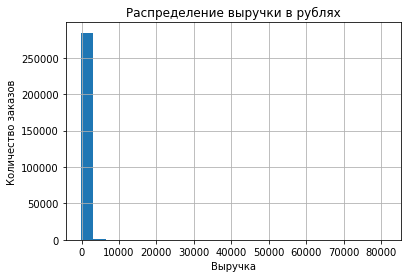

In [14]:
df[df['currency_code'] == 'rub']['revenue'].hist(bins=25)
plt.title('Распределение выручки в рублях')
plt.xlabel('Выручка')
plt.ylabel('Количество заказов')
plt.show()

In [15]:
display(df[df['currency_code'] == 'rub']['revenue'].describe())

count    285542.000000
mean        548.013929
std         871.750181
min         -90.760000
25%         114.170000
50%         346.630000
75%         793.320000
max       81174.540000
Name: revenue, dtype: float64

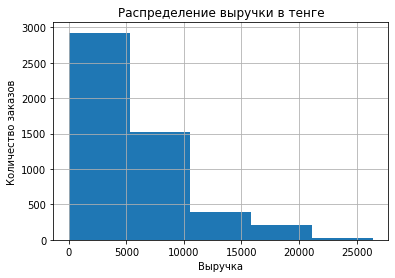

In [16]:
df[df['currency_code'] == 'kzt']['revenue'].hist(bins=5)
plt.title('Распределение выручки в тенге')
plt.xlabel('Выручка')
plt.ylabel('Количество заказов')
plt.show()

In [17]:
display(df[df['currency_code'] == 'kzt']['revenue'].describe())

count     5069.000000
mean      4995.206767
std       4916.752776
min          0.000000
25%        518.100000
50%       3698.830000
75%       7397.660000
max      26425.860000
Name: revenue, dtype: float64

Если для тенге не так сильно заметно наличие выбросов, то для рублей выбросов много они больше плюс есть отрицательные значения, трактовать которые довольно сложно, хвосты и отрицательные значения нужно исключить

In [18]:
display(df[df['revenue'] <0]['revenue'].count()/ df['revenue'].count())
display(df[df['currency_code'] == 'rub']['revenue'].quantile(0.99))
display(df[df['currency_code'] == 'kzt']['revenue'].quantile(0.99))
display(df[df['currency_code'] == 'kzt']['revenue'].quantile(0.90))

0.0013110308969722412

2570.8

17617.24

13212.93

Отрицательные значения составляют чуть больше 0.1%, тяжелые хвосты 1% все удаляем, навскидку при переводе тенге сумм некоторых операций будет больше условного числа в 2.5к, на вскидку нужно убрать чуть меньше 10 процентов данных чтобыы при переводе в рубли получилась сумма ниже 2.5 к при этом это другой рынок и нельзя ставить такое ограничение, Принято решение  отобрать значения по 99-му процентилю независимо в двух группах, затем убрать отрицательные значения и работать с тем что получится, в случае чего проводить исследование в разрезе рынков

In [19]:
df_rub = df[df['currency_code'] == 'rub']
df_kzt = df[df['currency_code'] == 'kzt']

df_rub = df_rub[df_rub['revenue'] <= df_rub['revenue'].quantile(0.99)]
df_kzt = df_kzt[df_kzt['revenue'] <= df_kzt['revenue'].quantile(0.99)]

df = pd.concat([df_rub, df_kzt])
df = df[df['revenue'] >= 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287401 entries, 0 to 290727
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                287401 non-null  int64  
 1   user_id                 287401 non-null  object 
 2   created_dt_msk          287401 non-null  object 
 3   created_ts_msk          287401 non-null  object 
 4   event_id                287401 non-null  int64  
 5   cinema_circuit          287401 non-null  object 
 6   age_limit               287401 non-null  int64  
 7   currency_code           287401 non-null  object 
 8   device_type_canonical   287401 non-null  object 
 9   revenue                 287401 non-null  float64
 10  service_name            287401 non-null  object 
 11  tickets_count           287401 non-null  int64  
 12  total                   287401 non-null  float64
 13  days_since_prev         265725 non-null  float64
 14  event_name          

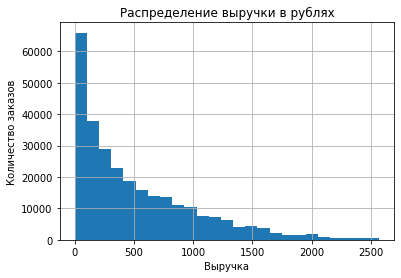

In [20]:
df[df['currency_code'] == 'rub']['revenue'].hist(bins=25)
plt.title('Распределение выручки в рублях')
plt.xlabel('Выручка')
plt.ylabel('Количество заказов')
plt.show()

In [21]:
display(df[df['currency_code'] == 'rub']['revenue'].describe())

count    282361.000000
mean        511.501020
std         500.914811
min           0.000000
25%         113.020000
50%         341.710000
75%         782.410000
max        2570.800000
Name: revenue, dtype: float64

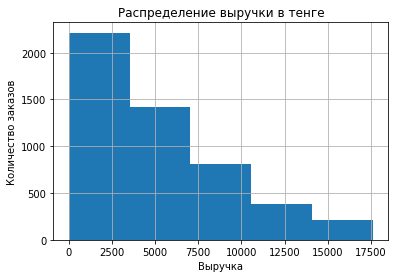

In [22]:
df[df['currency_code'] == 'kzt']['revenue'].hist(bins=5)
plt.title('Распределение выручки в тенге')
plt.xlabel('Выручка')
plt.ylabel('Количество заказов')
plt.show()

In [23]:
display(df[df['currency_code'] == 'kzt']['revenue'].describe())

count     5040.000000
mean      4893.669063
std       4742.680176
min          0.000000
25%        515.350000
50%       3698.830000
75%       7397.660000
max      17617.240000
Name: revenue, dtype: float64

In [24]:
df.shape

(287401, 24)

Удалено 3210 строк

*Кол-во билетов*

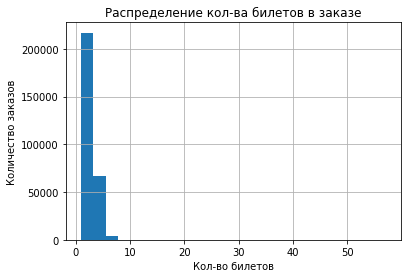

In [25]:
df['tickets_count'].hist(bins=25)
plt.title('Распределение кол-ва билетов в заказе')
plt.xlabel('Кол-во билетов')
plt.ylabel('Количество заказов')
plt.show()

In [26]:
display(df['tickets_count'].describe())

count    287401.000000
mean          2.741045
std           1.162490
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max          57.000000
Name: tickets_count, dtype: float64

In [27]:
display(df['tickets_count'].quantile(0.99))

6.0

In [28]:
display(df[df['tickets_count'] > df['tickets_count'].quantile(0.99)]['tickets_count'].count()/ df['tickets_count'].count())

0.0006263026224682586

Уберем все что больше 6, это 0.06% от общего кол-ва и не повлияет на анализ

In [29]:
df = df[df['tickets_count'] <= df['tickets_count'].quantile(0.99)]

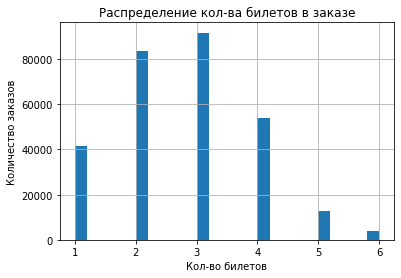

In [30]:
df['tickets_count'].hist(bins=25)
plt.title('Распределение кол-ва билетов в заказе')
plt.xlabel('Кол-во билетов')
plt.ylabel('Количество заказов')
plt.show()

In [31]:
display(df['tickets_count'].describe())

count    287221.000000
mean          2.736182
std           1.135564
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max           6.000000
Name: tickets_count, dtype: float64

In [32]:
df.shape

(287221, 24)

Удалено 180 строк

#### Дубликаты

С точки зрения смысловой нагрузки один пользователь не может купить, в одно и тоже время билет, на одно и то же мероприятие, такие дубликаты - ошибка

In [33]:
df.duplicated(subset=['user_id', 'created_dt_msk', 'created_ts_msk' , 'event_id']).sum() /df['order_id'].count()

0.0004073518301238419

Окколо 0.04% смело удаляем


In [34]:
df = df.drop_duplicates(subset=['user_id', 'created_dt_msk', 'created_ts_msk' , 'event_id'])
df = df.reset_index(drop=True)
df.shape

(287104, 24)

Удалено 117 строк

#### Типы данных

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287104 entries, 0 to 287103
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                287104 non-null  int64  
 1   user_id                 287104 non-null  object 
 2   created_dt_msk          287104 non-null  object 
 3   created_ts_msk          287104 non-null  object 
 4   event_id                287104 non-null  int64  
 5   cinema_circuit          287104 non-null  object 
 6   age_limit               287104 non-null  int64  
 7   currency_code           287104 non-null  object 
 8   device_type_canonical   287104 non-null  object 
 9   revenue                 287104 non-null  float64
 10  service_name            287104 non-null  object 
 11  tickets_count           287104 non-null  int64  
 12  total                   287104 non-null  float64
 13  days_since_prev         265439 non-null  float64
 14  event_name          

created_dt_msk, created_ts_msk, меняем формат на датувремя

order_id, event_id, age_limit, revenue, tickets_count, total, city_id, venue_id - можно оптимизировать типы

In [36]:
df['created_dt_msk'] = pd.to_datetime(df['created_dt_msk'])
df['created_ts_msk'] = pd.to_datetime(df['created_ts_msk'])

df['order_id'] = pd.to_numeric(df['order_id'],downcast='integer')
df['event_id'] = pd.to_numeric(df['event_id'],downcast='integer')
df['age_limit'] = pd.to_numeric(df['age_limit'],downcast='integer')
df['tickets_count'] = pd.to_numeric(df['tickets_count'],downcast='integer')
df['city_id'] = pd.to_numeric(df['city_id'],downcast='integer')
df['venue_id'] = pd.to_numeric(df['venue_id'],downcast='integer')

df['revenue'] = pd.to_numeric(df['revenue'],downcast='float')
df['total'] = pd.to_numeric(df['total'],downcast='float')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287104 entries, 0 to 287103
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                287104 non-null  int32         
 1   user_id                 287104 non-null  object        
 2   created_dt_msk          287104 non-null  datetime64[ns]
 3   created_ts_msk          287104 non-null  datetime64[ns]
 4   event_id                287104 non-null  int32         
 5   cinema_circuit          287104 non-null  object        
 6   age_limit               287104 non-null  int8          
 7   currency_code           287104 non-null  object        
 8   device_type_canonical   287104 non-null  object        
 9   revenue                 287104 non-null  float32       
 10  service_name            287104 non-null  object        
 11  tickets_count           287104 non-null  int8          
 12  total                   287104

#### Новые столбцы

In [37]:
df_tickets= pd.read_csv('3')
df_tickets['data'] =  pd.to_datetime(df_tickets['data'])

display(df_tickets.info())
display(df_tickets.head())
display(df_tickets.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   data     357 non-null    datetime64[ns]
 1   nominal  357 non-null    int64         
 2   curs     357 non-null    float64       
 3   cdx      357 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 11.3+ KB


None

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


(357, 4)

In [38]:
df = df.merge(df_tickets, how='left', left_on='created_dt_msk', right_on= 'data')

display(df.info())
display(df.head())
display(df.shape)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 287104 entries, 0 to 287103
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                287104 non-null  int32         
 1   user_id                 287104 non-null  object        
 2   created_dt_msk          287104 non-null  datetime64[ns]
 3   created_ts_msk          287104 non-null  datetime64[ns]
 4   event_id                287104 non-null  int32         
 5   cinema_circuit          287104 non-null  object        
 6   age_limit               287104 non-null  int8          
 7   currency_code           287104 non-null  object        
 8   device_type_canonical   287104 non-null  object        
 9   revenue                 287104 non-null  float32       
 10  service_name            287104 non-null  object        
 11  tickets_count           287104 non-null  int8          
 12  total                   287104

None

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,region_name,city_name,city_id,venue_id,venue_name,venue_address,data,nominal,curs,cdx
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.939941,...,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,100,18.6972,kzt
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.450012,...,Каменевский регион,Глиногорск,213,2941,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-07-23,100,18.3419,kzt
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.569946,...,Каменевский регион,Глиногорск,213,4507,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",2024-10-06,100,19.6475,kzt
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.490000,...,Североярская область,Озёрск,2,3574,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",2024-07-13,100,18.5010,kzt
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.410034,...,Озернинский край,Родниковецк,240,1896,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-10-04,100,19.6648,kzt


(287104, 28)

In [39]:
def kzt_to_rub(row):
    if row['currency_code'] == 'kzt':
        return row['revenue'] * row['curs'] / row['nominal']
    else: return row['revenue']

df['revenue_rub'] = df.apply(kzt_to_rub, axis=1)


In [40]:
df = df.drop('data', axis=1)
df = df.drop('nominal', axis=1)
df = df.drop('curs', axis=1)
df = df.drop('cdx', axis=1)


In [41]:
df['one_ticket_revenue_rub'] = df['revenue_rub'] / df['tickets_count']


In [42]:
df['month'] = df['created_dt_msk'].dt.month_name()


In [43]:
def month_to_seson(row):
    if row['month'] == 'June': return 'Лето'
    elif row['month'] == 'July': return 'Лето'
    elif row['month'] == 'August': return 'Лето'
    elif row['month'] == 'September': return 'Осень'
    elif row['month'] == 'October': return 'Осень'
    else: return 'Зима'

df['season'] = df.apply(month_to_seson, axis=1)


In [44]:
display(df.info())
display(df.head())
display(df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287104 entries, 0 to 287103
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                287104 non-null  int32         
 1   user_id                 287104 non-null  object        
 2   created_dt_msk          287104 non-null  datetime64[ns]
 3   created_ts_msk          287104 non-null  datetime64[ns]
 4   event_id                287104 non-null  int32         
 5   cinema_circuit          287104 non-null  object        
 6   age_limit               287104 non-null  int8          
 7   currency_code           287104 non-null  object        
 8   device_type_canonical   287104 non-null  object        
 9   revenue                 287104 non-null  float32       
 10  service_name            287104 non-null  object        
 11  tickets_count           287104 non-null  int8          
 12  total                   287104

None

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,region_name,city_name,city_id,venue_id,venue_name,venue_address,revenue_rub,one_ticket_revenue_rub,month,season
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.939941,...,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",1521.939941,380.484985,August,Лето
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.450012,...,Каменевский регион,Глиногорск,213,2941,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",289.450012,144.725006,July,Лето
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.569946,...,Каменевский регион,Глиногорск,213,4507,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",1258.569946,314.642487,October,Осень
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.490000,...,Североярская область,Озёрск,2,3574,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",8.490000,4.245000,July,Лето
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.410034,...,Озернинский край,Родниковецк,240,1896,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",1390.410034,463.470011,October,Осень


(287104, 28)

**Промежуточные выводы**

На этапе предобработке было удалено 3745 строк, что составляет около 1,3% от общего начально кол-ва строк что не критично
На данном этапе были проведены следующие подэтапы:
- Объединение двух датафреймов и проверка на пропуски, по результатам данного этапа было удалено 238 строк, в которых отсутствовала иинформация о мероприятиях
- Были более детально изучены нужные стоолбцыы с категориальными значениями(ничего особенного не было обнаружно в том числе неявныых дубликатов, также стиль един), с количесвтенными значениями (было удалено 3210 строк при изучении столбца выыручки тяжелые хвосты и неинформативные отрицательныые значения, а также 180 строк при изучении столбца кол-во билетов, тоже удалили тяжелые хвосты)
- Была произведена проверка на дубликаты, неявно дублирующиеся строчки в размере 117 быыли удалены
- Было произведена оптимизация количесвтенным типов данныых столбцов, а также сотлбцы датавремя были приведены к соотв типу данных pandas
- Для дальнейшего анализа были созданы четыре новых столбца 
   
   - `revenue_rub` - выручка с заказа в единой валюте
   
   - `one_ticket_revenue_rub` - ыручку с продажи одного билета на мероприятие
   
   - `month` - месяц оформления заказа
  
   - `season` - столбец с информацией о сезонности

### Исследовательский анализ данных

#### Анализ распределения заказов по сегментам и их сезонные изменения

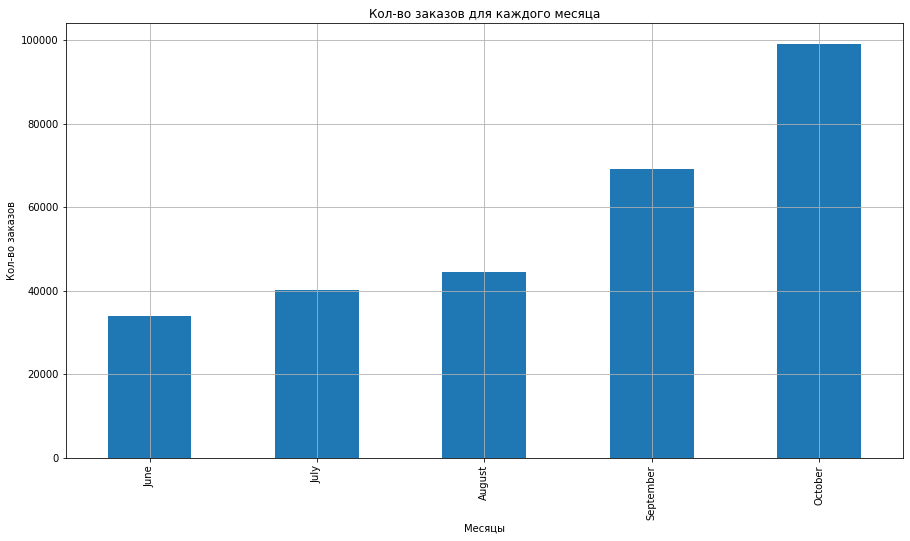

In [45]:
df.groupby(['month'])['order_id'].count().sort_values().plot(kind='bar', figsize = (15, 8))
plt.title('Кол-во заказов для каждого месяца')
plt.xlabel('Месяцы')
plt.ylabel('Кол-во заказов')
plt.grid()
plt.show()

Фиксируется увеличение заказов от июня к ноябрю 2024 года

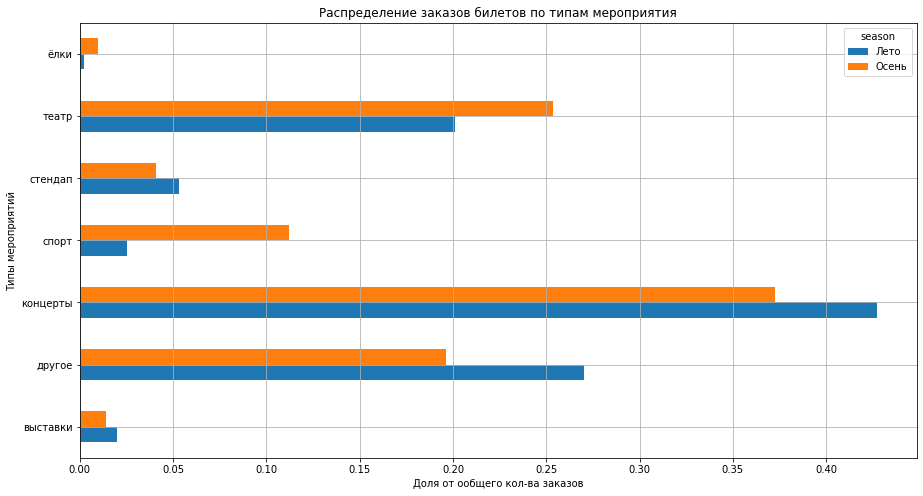

In [46]:
orders_1_df = df.groupby(['season', 'event_type_main'])['order_id'].count().reset_index()
orders_1_df = orders_1_df.merge(orders_1_df.groupby(['season']).sum(), how='left', on='season')
orders_1_df['share'] = orders_1_df['order_id_x'] / orders_1_df['order_id_y']

orders_1_df.groupby(['event_type_main', 'season'])['share'].sum().unstack().plot(kind='barh', figsize = (15, 8), legend=True)
plt.title('Распределение заказов билетов по типам мероприятия')
plt.xlabel('Доля от ообщего кол-ва заказов')
plt.ylabel('Типы мероприятий')
plt.grid()
plt.show()

,season,device_type_canonical,order_id_x,order_id_y,share
0,Лето,desktop,23007,118826,0.193619
1,Лето,mobile,95819,118826,0.806381
2,Осень,desktop,34233,168278,0.203431
3,Осень,mobile,134045,168278,0.796569


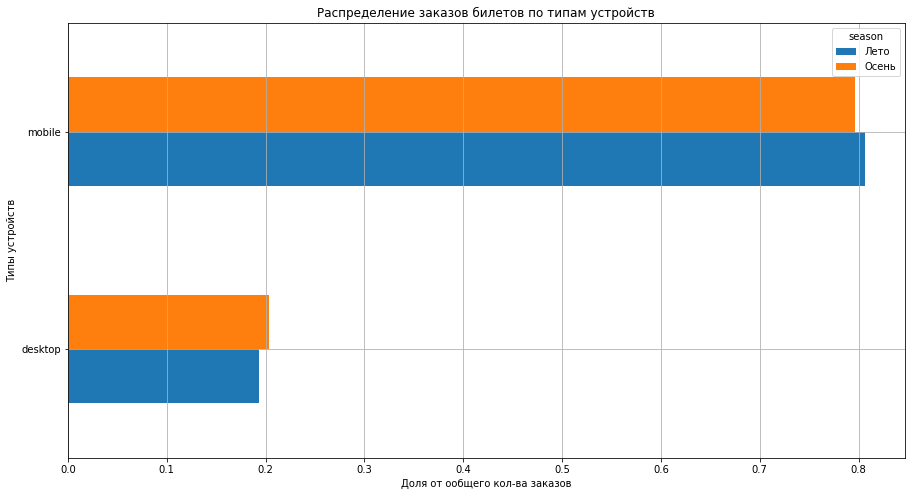

In [47]:
orders_2_df = df.groupby(['season', 'device_type_canonical'])['order_id'].count().reset_index()
orders_2_df = orders_2_df.merge(orders_2_df.groupby(['season']).sum(), how='left', on='season')
orders_2_df['share'] = orders_2_df['order_id_x'] / orders_2_df['order_id_y']
display(orders_2_df)
orders_2_df.groupby(['device_type_canonical', 'season'])['share'].sum().unstack().plot(kind='barh', figsize = (15, 8), legend=True)
plt.title('Распределение заказов билетов по типам устройств')
plt.xlabel('Доля от ообщего кол-ва заказов')
plt.ylabel('Типы устройств')
plt.grid()
plt.show()

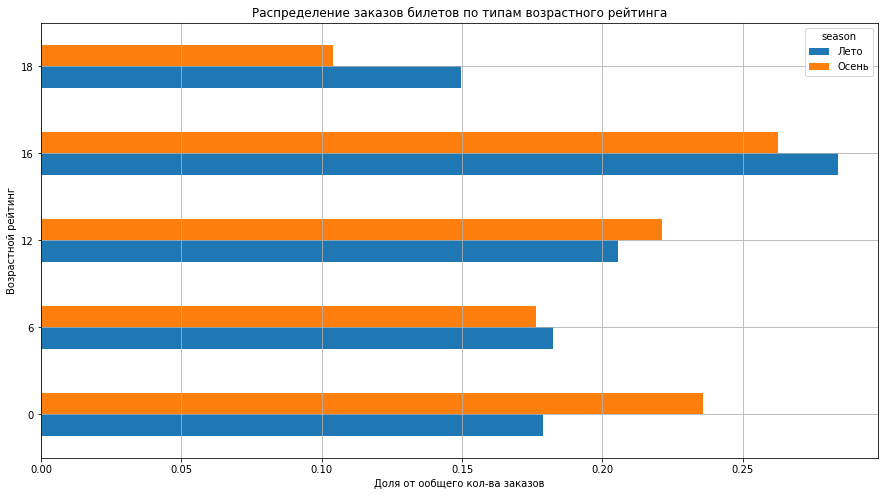

In [48]:
orders_3_df = df.groupby(['season', 'age_limit'])['order_id'].count().reset_index()
orders_3_df = orders_3_df.merge(orders_3_df.groupby(['season']).sum(), how='left', on='season')
orders_3_df['share'] = orders_3_df['order_id_x'] / orders_3_df['order_id_y']

orders_3_df.groupby(['age_limit_x', 'season'])['share'].sum().unstack().plot(kind='barh', figsize = (15, 8), legend=True)
plt.title('Распределение заказов билетов по типам возрастного рейтинга')
plt.xlabel('Доля от ообщего кол-ва заказов')
plt.ylabel('Возрастной рейтинг')
plt.grid()
plt.show()

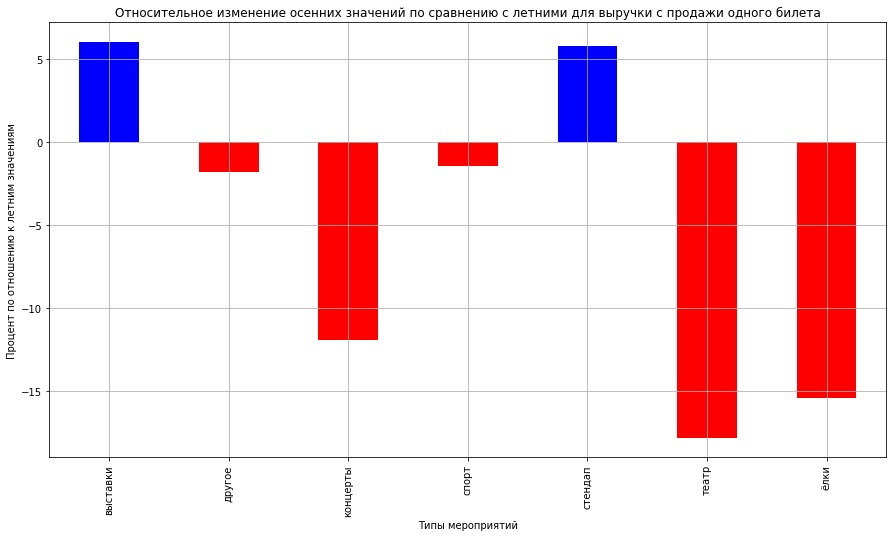

In [49]:
df_new = df.groupby(['season', 'event_type_main'])['one_ticket_revenue_rub'].mean().reset_index()
df_l = df_new[df_new['season'] == 'Лето']
df_o = df_new[df_new['season'] == 'Осень']
df_new = df_l.merge(df_o, how='left', on='event_type_main', suffixes = ('_l','_o') ) 
df_new['share'] = (df_new['one_ticket_revenue_rub_o'] - df_new['one_ticket_revenue_rub_l'])/df_new['one_ticket_revenue_rub_l'] *100
df_new
col = ['blue', 'red', 'red', 'red', 'blue','red', 'red']
df_new.groupby(['event_type_main'])['share'].sum().plot(kind='bar', figsize = (15, 8), color = col)
plt.title('Относительное изменение осенних значений по сравнению с летними для выручки с продажи одного билета')
plt.xlabel('Типы мероприятий')
plt.ylabel('Процент по отношению к летним значениям')
plt.grid()
plt.show()

**Промежуточные выводы**

Рапределение закаказов для типа устройств не меняется в разрезе сезона
Рапределение закаказов для возрастного рейтинга меняется в разрезе сезона: в большей степени стало больше заказов для мероприятий рейтингом и меньше с рейтингом 18, в меньшей степени стало больше заказов в категории 12, и меньше с рейтингом 16 и 6
Рапределение закаказов для типа устройств меняется в разрезе типа мероприятий: в большей степени стало больше заказов для мероприятий театр и спорт(закончилося отдых у спортсменов и у артистов гастроли) и стало меньше для категорий концерты, стендапы и другое, другие категории изменнились в меньшей степени
Было изменение средней стоимости одного билета в разрезе разных типов мероприятий выставки и стендап - показатель возрос больше чем на 5 процентов, для театра и елок показатель упал на 15 процентов, для концертов эта цифра 12%

#### Осенняя активность пользователей

In [50]:
df_aut = df[df['season'] == 'Осень']
series_1 = df_aut.groupby('created_dt_msk')[ 'user_id'].nunique('user_id')
series_2 = df_aut.groupby('created_dt_msk')[ 'order_id'].count()
series_3 = df_aut.groupby('created_dt_msk')[ 'one_ticket_revenue_rub'].mean()
table = pd.merge(series_1,series_2, how='left', left_index=True, right_index=True)
table['avg_numm_orders_per_user'] = table['order_id'] / table['user_id']
table = table.merge(series_3, how='left', left_index=True, right_index=True)
table = table.reset_index()
display(table)

,created_dt_msk,user_id,order_id,avg_numm_orders_per_user,one_ticket_revenue_rub
0,2024-09-01,564,1327,2.352837,200.168708
1,2024-09-02,573,1375,2.399651,190.136527
2,2024-09-03,777,5094,6.555985,80.650134
3,2024-09-04,683,1759,2.575403,179.393891
4,2024-09-05,738,1937,2.624661,190.058369
...,...,...,...,...,...
56,2024-10-27,1032,2844,2.755814,187.300193
57,2024-10-28,985,2835,2.878173,170.661577
58,2024-10-29,998,2828,2.833667,177.748465
59,2024-10-30,1039,2925,2.815207,182.916837


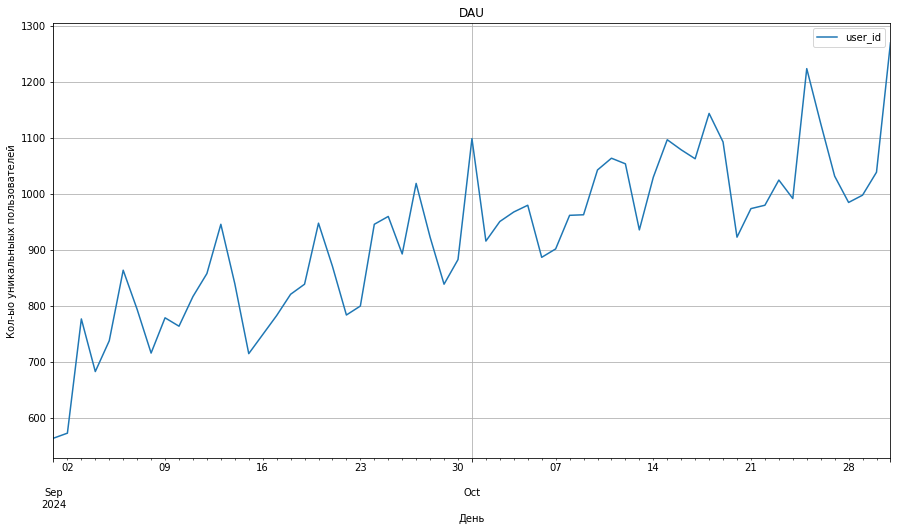

In [51]:
table.plot.line(
    figsize = (15, 8),
    x='created_dt_msk',
    y='user_id',
    title='DAU'
)

# Подписываем и отображаем график
plt.xlabel('День')
plt.ylabel('Кол-ыо уникальныых пользователей')
plt.grid()
plt.show()

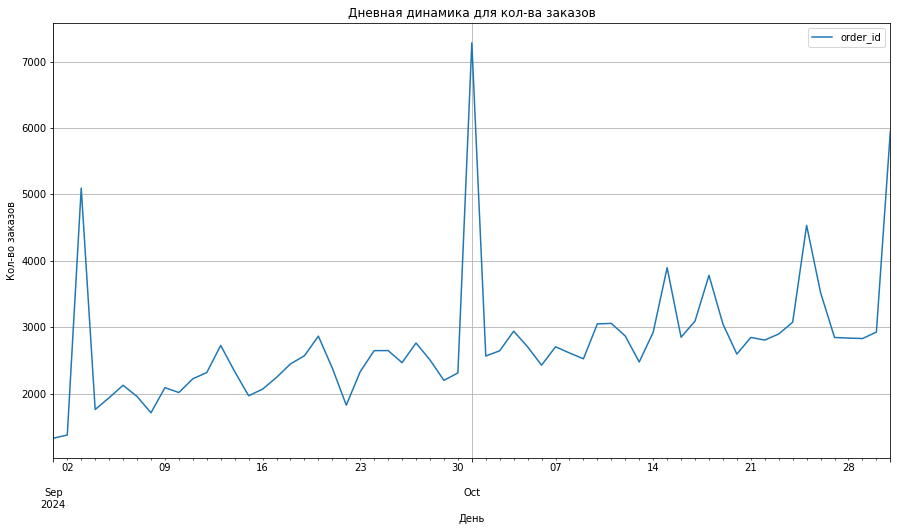

In [52]:
table.plot.line(
    figsize = (15, 8),
    x='created_dt_msk',
    y='order_id',
    title='Дневная динамика для кол-ва заказов'
)

# Подписываем и отображаем график
plt.xlabel('День')
plt.ylabel('Кол-во заказов')
plt.grid()
plt.show()

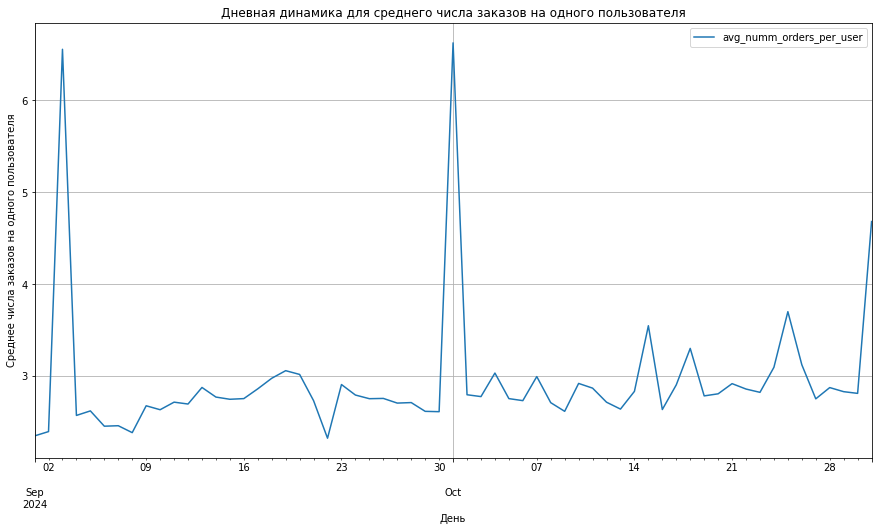

In [53]:
table.plot.line(
    figsize = (15, 8),
    x='created_dt_msk',
    y='avg_numm_orders_per_user',
    title='Дневная динамика для среднего числа заказов на одного пользователя'
)

# Подписываем и отображаем график
plt.xlabel('День')
plt.ylabel('Среднее числа заказов на одного пользователя')
plt.grid()
plt.show()

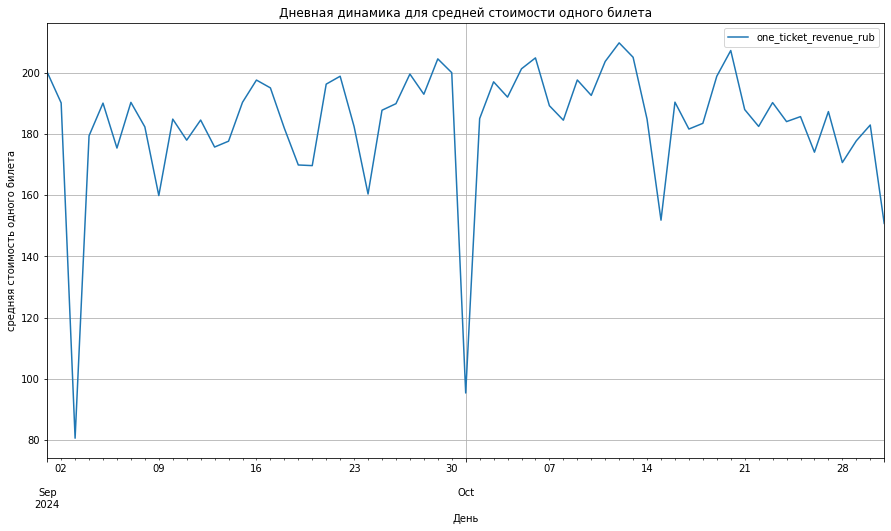

In [54]:
table.plot.line(
    figsize = (15, 8),
    x='created_dt_msk',
    y='one_ticket_revenue_rub',
    title='Дневная динамика для средней стоимости одного билета'
)

# Подписываем и отображаем график
plt.xlabel('День')
plt.ylabel('средняя стоимость одного билета')
plt.grid()
plt.show()

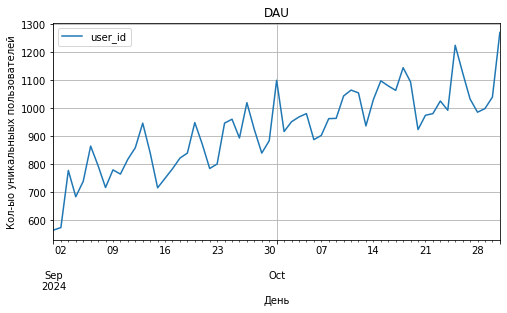

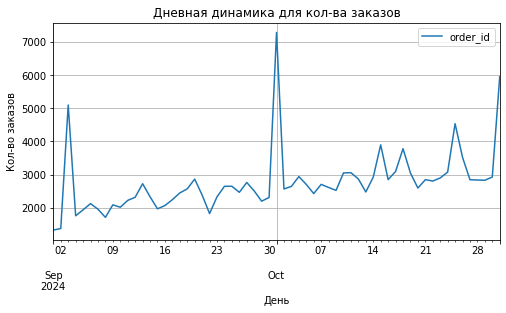

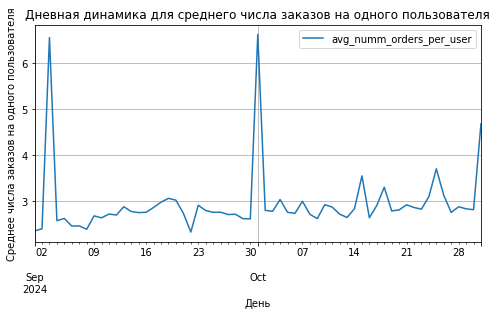

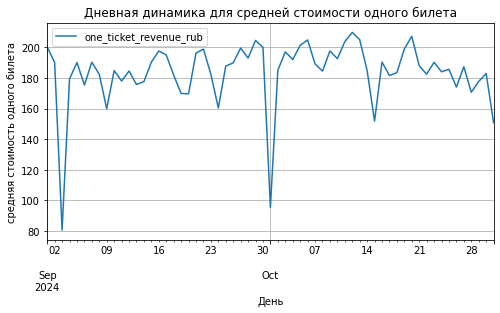

In [55]:

table.plot.line(
    figsize = (8, 4),
    x='created_dt_msk',
    y='user_id',
    title='DAU'
)
plt.xlabel('День')
plt.ylabel('Кол-ыо уникальныых пользователей')
plt.grid()
plt.show()
table.plot.line(
    figsize = (8, 4),
    x='created_dt_msk',
    y='order_id',
    title='Дневная динамика для кол-ва заказов'
)
plt.xlabel('День')
plt.ylabel('Кол-во заказов')
plt.grid()
plt.show()
table.plot.line(
    figsize = (8, 4),
    x='created_dt_msk',
    y='avg_numm_orders_per_user',
    title='Дневная динамика для среднего числа заказов на одного пользователя'
)
plt.xlabel('День')
plt.ylabel('Среднее числа заказов на одного пользователя')
plt.grid()
plt.show()

table.plot.line(
    figsize = (8, 4),
    x='created_dt_msk',
    y='one_ticket_revenue_rub',
    title='Дневная динамика для средней стоимости одного билета'
)
plt.xlabel('День')
plt.ylabel('средняя стоимость одного билета')
plt.grid()
plt.show()
plt.show()

In [56]:
#table['created_dt_msk'] = pd.to_datetime(table['created_dt_msk'] )
table['d_of_w'] = table['created_dt_msk'].dt.dayofweek
display(table)
display(table[table['created_dt_msk'] == '2024-10-01'])

,created_dt_msk,user_id,order_id,avg_numm_orders_per_user,one_ticket_revenue_rub,d_of_w
0,2024-09-01,564,1327,2.352837,200.168708,6
1,2024-09-02,573,1375,2.399651,190.136527,0
2,2024-09-03,777,5094,6.555985,80.650134,1
3,2024-09-04,683,1759,2.575403,179.393891,2
4,2024-09-05,738,1937,2.624661,190.058369,3
...,...,...,...,...,...,...
56,2024-10-27,1032,2844,2.755814,187.300193,6
57,2024-10-28,985,2835,2.878173,170.661577,0
58,2024-10-29,998,2828,2.833667,177.748465,1
59,2024-10-30,1039,2925,2.815207,182.916837,2


,created_dt_msk,user_id,order_id,avg_numm_orders_per_user,one_ticket_revenue_rub,d_of_w
30,2024-10-01,1099,7282,6.626024,95.415219,1


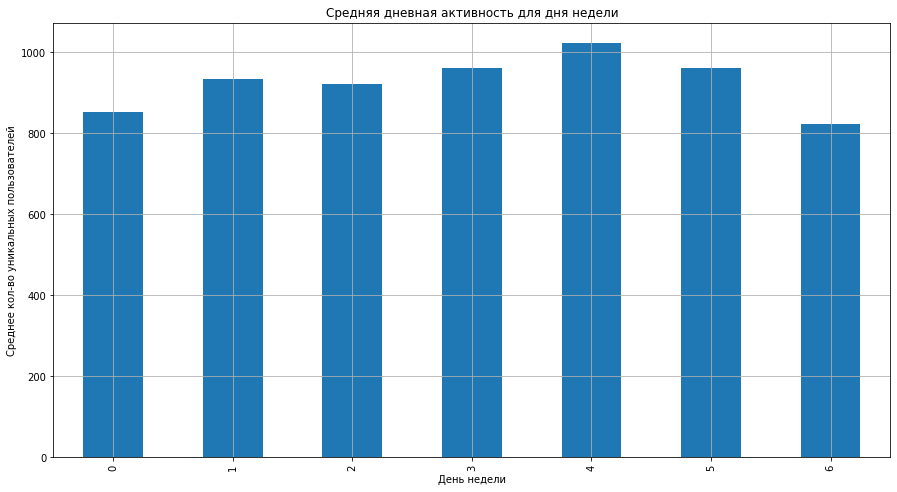

In [57]:
table.groupby('d_of_w')['user_id'].mean().plot(kind='bar', figsize = (15, 8))
plt.title('Средняя дневная активность для дня недели')
plt.xlabel('День недели')
plt.ylabel('Среднее кол-во уникальных пользователей')
plt.grid()
plt.show()

**Промежуточные выводы**

Видно что дневная активность пользователей растет если сравнивать начало периода с концом, что ткже можно сказать,о тренде для кол-ва заказов каждый день. Можно наблюдать колебания - это колебания дня недели, как можно заметить на последней диаграмме в среднем активность пользователей повышается от пн до пт (пятница пиковая активность ну не удивительно) и спад к вс (все готовятся к работе). Дневная динамика для среднего числа заказов на одного пользователя и Дневная динамика для средней стоимости одного билета плюс минус колеблется в одном диапазоне, в глаза бросаются 2 сенятбря (день знаний официальный 1 сентяюря в вс а вот второго праздник, все собираются в коллективы празднуют и тд, плюс мероприятия, наверное и скидки есть) и 31 хелоуин тоже праздник тоже мероприятия и скидки и спрос, динамика кол-ва заказов тожее подтверждает повышенный спрос в эти дни, 1 октября лидер, но до конуа непонятно что так влияет на динамику в этот день, пока - аномалия


#### Популярные события и партнёры

In [58]:
df_aut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168278 entries, 2 to 287101
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                168278 non-null  int32         
 1   user_id                 168278 non-null  object        
 2   created_dt_msk          168278 non-null  datetime64[ns]
 3   created_ts_msk          168278 non-null  datetime64[ns]
 4   event_id                168278 non-null  int32         
 5   cinema_circuit          168278 non-null  object        
 6   age_limit               168278 non-null  int8          
 7   currency_code           168278 non-null  object        
 8   device_type_canonical   168278 non-null  object        
 9   revenue                 168278 non-null  float32       
 10  service_name            168278 non-null  object        
 11  tickets_count           168278 non-null  int8          
 12  total                   168278

In [59]:
series_1 = df_aut.groupby('region_name')['event_id'].nunique('event_id')
series_2 = df_aut.groupby('region_name')['order_id'].count()

In [60]:
table_r = pd.merge(series_1,series_2, how='left', left_index=True, right_index=True)

table_r['share_event_id'] = table_r['event_id'] / df_aut['event_id'].nunique('event_id') * 100
table_r['share_order_id'] = table_r['order_id'] / df_aut['order_id'].count() * 100

table_r = table_r.sort_values(['share_event_id'],ascending=False ).reset_index()
display(table_r.head(20))

,region_name,event_id,order_id,share_event_id,share_order_id
0,Каменевский регион,3910,46656,24.693697,27.725549
1,Североярская область,2608,20639,16.470885,12.264824
2,Широковская область,796,8647,5.027157,5.138521
3,Светополянский округ,762,4765,4.812429,2.831624
4,Речиновская область,529,3563,3.340912,2.117330
5,Серебринская область,456,4467,2.879879,2.654536
6,Яблоневская область,431,4194,2.721991,2.492304
7,Тепляковская область,419,2483,2.646204,1.475535
8,Горицветская область,406,3229,2.564103,1.918849
9,Солнечноземская область,402,4196,2.538840,2.493493


In [61]:
series_1 = df_aut.groupby('service_name')['event_id'].nunique('event_id')
series_2 = df_aut.groupby('service_name')['order_id'].count()
series_3 = df_aut.groupby('service_name')['revenue'].sum()

In [62]:
table_o = pd.merge(series_1,series_2, how='left', left_index=True, right_index=True)
table_o = table_o.merge(series_3, how='left', left_index=True, right_index=True)

table_o['share_event_id'] = table_o['event_id'] / df_aut['event_id'].nunique('event_id') * 100
table_o['share_order_id'] = table_o['order_id'] / df_aut['order_id'].count() * 100
table_o['share_revenue'] = table_o['revenue'] / df_aut['revenue'].sum() * 100

table_o = table_o.sort_values(['share_event_id'],ascending=False ).reset_index()

display(table_o.head(20))

,service_name,event_id,order_id,revenue,share_event_id,share_order_id,share_revenue
0,Лови билет!,3611,25761,1.038033e+07,22.805356,15.308596,12.348399
1,Билеты без проблем,2833,32256,1.352828e+07,17.891878,19.168281,16.093193
2,Билеты в руки,2457,25632,7.610184e+06,15.517241,15.231938,9.053044
3,Облачко,1409,15478,1.061105e+07,8.898573,9.197875,12.622866
4,Лучшие билеты,1389,12395,1.672760e+06,8.772262,7.365788,1.989909
5,Мой билет,1002,19388,1.161739e+07,6.328155,11.521411,13.819999
6,Тебе билет!,858,3759,2.166185e+06,5.418719,2.233804,2.576885
7,Прачечная,728,5797,2.547752e+06,4.597701,3.444895,3.030796
8,Весь в билетах,599,9413,9.349297e+06,3.782999,5.593720,11.121888
9,Яблоко,537,3473,2.763332e+06,3.391436,2.063847,3.287249


**Промежуточные выводы**

В качесвте метрики разнообразности мероприятий для регионов а также активности билетных партнеров было выбрано число уникальных организованных мероприятий, ну или их доля от общего. Для каждого сегмента был составлен топ-20.
Для организаоторв нельзя выделить особенно активных на каждого партнера не приходится больше 1 процента от общего числа уникальных мероприятий
Среди районов есть лидеры Каменевский регион 24%, Североярская область 16% - значения нашей метрики на порядок выше сравнивая с конкурентами, оставльные регионы топа проводят от 5 до 1 % от всех уникальных мероприятий

### Статистический анализ данных

**Первая гипотеза**

Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств. Сформируем нулевую гипотезу и альтернативные гипотезы.

- Нулевая гипотеза (Н0): Среднее количество заказов на одного пользователя мобильного приложения и стациоонарных устройств одинакова
- Альтернативная гипотеза (Н1):Среднее количество заказов на одного пользователя мобильного приложения больше чем у пользователей стационарных устройств 

In [63]:
df_mobile = df_aut[df_aut['device_type_canonical'] == 'mobile'].groupby('user_id')['order_id'].count()
df_desktop = df_aut[df_aut['device_type_canonical'] == 'desktop'].groupby('user_id')['order_id'].count()


display(df_mobile.mean())
display(df_desktop.mean())

9.453769659355384

7.035141800246609

In [64]:
display(df_mobile.describe())

count    14179.000000
mean         9.453770
std         67.956351
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       4326.000000
Name: order_id, dtype: float64

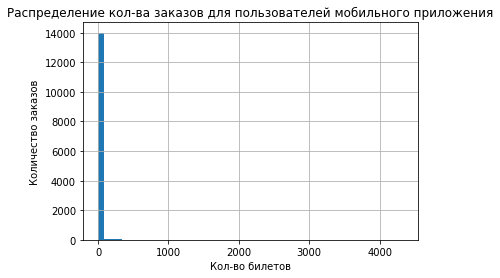

In [65]:
df_mobile.hist(bins=50)
plt.title('Распределение кол-ва заказов для пользователей мобильного приложения')
plt.xlabel('Кол-во билетов')
plt.ylabel('Количество заказов')
plt.show()

In [66]:
display(df_desktop.describe())

count    4866.000000
mean        7.035142
std        35.844305
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max      1491.000000
Name: order_id, dtype: float64

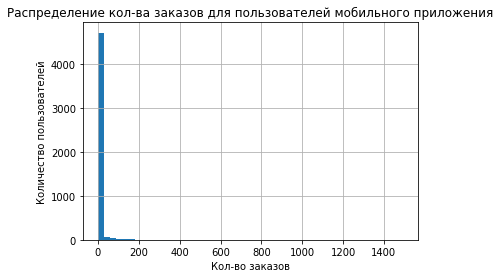

In [67]:
df_desktop.hist(bins=50)
plt.title('Распределение кол-ва заказов для пользователей мобильного приложения')
plt.xlabel('Кол-во заказов')
plt.ylabel('Количество пользователей')
plt.show()

Сначала мы сравнили средние значения кол-ва пользователей в разрезе типов устройств, это сравнениие лишь подтверждаеет лишний раз нашу гипотезу, однако взглянув на рспределения двух велечин видно что есть очень тяжелыые хвосты от которых нужно избавиться 

In [68]:
display(df_desktop.quantile(0.97))
display(df_mobile.quantile(0.97))


34.0

40.0

In [69]:
df_desktop = df_desktop[df_desktop <= df_desktop.quantile(0.97)]
df_mobile = df_mobile[df_mobile <= df_mobile.quantile(0.97)]

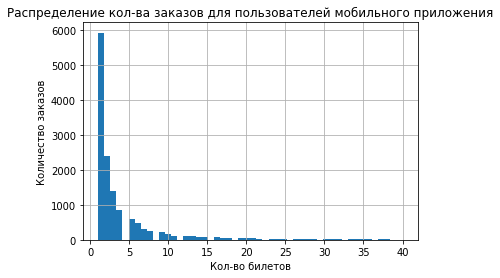

count    13754.000000
mean         3.966628
std          5.571489
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         40.000000
Name: order_id, dtype: float64

In [70]:
df_mobile.hist(bins=50)
plt.title('Распределение кол-ва заказов для пользователей мобильного приложения')
plt.xlabel('Кол-во билетов')
plt.ylabel('Количество заказов')
plt.show()
display(df_mobile.describe())

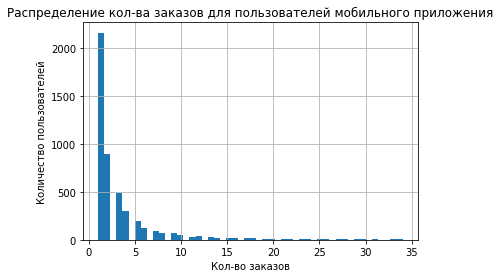

count    4724.000000
mean        3.390771
std         4.616677
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        34.000000
Name: order_id, dtype: float64

In [71]:
df_desktop.hist(bins=50)
plt.title('Распределение кол-ва заказов для пользователей мобильного приложения')
plt.xlabel('Кол-во заказов')
plt.ylabel('Количество пользователей')
plt.show()
display(df_desktop.describe())

Отчасти экспериментальным путем мы выбрали отсеч данные по 97 квантилю чтобы сделать распределение хоть немного похожим на нормальное у обоих выборок. Можно заметить, что кол-во пользователей в двух выборках различное и отличается в три раза, в сравнение с небольшими значениями среднего выыборок, стандартные отклонения тоже сложно прредставить как равные, распределение для стационарных устройст как уменьшенная версия распределения для мобильного приложения, поэтому приниаю решение провести статистический t-тест Уэлча, модификацию t-теста Стьюдента, которая не требует равенства дисперсий, задаим уровень значимости статистического теста альфа равный 0.05

In [72]:
def print_stattest_results(p_value:float, alpha:float = 0.05):
    if p_value < alpha:
        print(f'Полученное значение p_value={p_value} меньше критического уровня alpha={alpha}. Принимаем альтернативную гипотезу.')
    else:
        print(f'Полученное значение p_value={p_value} больше критического уровня alpha={alpha}. Опровергнуть нулевую гипотезу нельзя.')

print_stattest_results(p_value=0.0001)
print_stattest_results(p_value=0.1)

Полученное значение p_value=0.0001 меньше критического уровня alpha=0.05. Принимаем альтернативную гипотезу.
Полученное значение p_value=0.1 больше критического уровня alpha=0.05. Опровергнуть нулевую гипотезу нельзя.


In [73]:
results = st.ttest_ind(df_mobile, df_desktop, equal_var=False, alternative= 'greater') # Укажите подходящий инструмент здесь
p_value = results.pvalue
print_stattest_results(p_value)

Полученное значение p_value=1.3694286155534415e-12 меньше критического уровня alpha=0.05. Принимаем альтернативную гипотезу.


**Выводы**

По результатам статистического теста монжо с уверенностью заявить о том, что ср. кол-во заказов пользователей мобильного приложения больше, чем для пользователей стационарного компьютера

**Вторая гипотеза**

Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.Сформируем нулевую гипотезу и альтернативные гипотезы.

- Нулевая гипотеза (Н0): Среднее время между заказами пользователей мобильных приложений и стациоонарных устройств одинакова
- Альтернативная гипотеза (Н1):Среднее время между заказами пользователей мобильных приложений больше чем у пользователей стационарных устройств 

In [74]:
df_aut[df_aut['days_since_prev'].isna()]['order_id'].count() / df_aut['order_id'].count()
#df_aut.info()

0.0495370755535483

In [75]:
display(df_aut[df_aut['days_since_prev'].isna()].head())

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,region_name,city_name,city_id,venue_id,venue_name,venue_address,revenue_rub,one_ticket_revenue_rub,month,season
7,4657981,000a55a418c128c,2024-09-29,2024-09-29 19:39:12,265857,нет,12,rub,mobile,47.779999,...,Поленовский край,Дальнозолотск,18,3159,"Клуб начинающих писателей ""Таблицы"" Групп","ул. О.Кошевого, д. 7",47.779999,47.779999,September,Осень
34,5896542,0028d17a676f8c8,2024-09-07,2024-09-07 21:02:03,534657,нет,16,rub,desktop,1018.820007,...,Ветренский регион,Кокжар,20,2866,"Школа фотографии ""Золотое"" Инк","ш. Микрорайон, д. 79 стр. 50",1018.820007,339.606669,September,Осень
70,5721846,0033e08fba8d0c9,2024-09-03,2024-09-03 07:16:44,505973,нет,12,rub,mobile,1241.229980,...,Горицветская область,Островецк,50,4158,"Студия видеомонтажа ""Мозаика"" Лимитед","наб. Пригородная, д. 51 стр. 81",1241.229980,413.743327,September,Осень
79,2923607,003764d5339bb45,2024-10-24,2024-10-24 22:53:40,583026,нет,6,rub,mobile,39.779999,...,Североярская область,Озёрск,2,1544,"Творческая лаборатория ""Шанс"" Инкорпорэйтед","бул. Литейный, д. 72 к. 909",39.779999,13.260000,October,Осень
80,8478905,00377cfae7548b7,2024-10-22,2024-10-22 06:57:17,124695,нет,0,rub,mobile,1043.459961,...,Речиновская область,Дальнесветск,65,4481,"Школа сценического мастерства ""Вдох"" Лтд","пер. Полярный, д. 87",1043.459961,208.691992,October,Осень


У нас есть столбцец `days_since_prev`, который содеержит количеством дней с предыдущей покупки для каждого пользователя. Если покупки не было, то данные содержат пропуск, кол-во столбцов с пропусками сосавляет 5 процентов, эти пропуски неьзя заполнить ибо они олицетворяют первй заказ пользователя, 5 процентов довльно много, однако для дальнейшего анализа нам придется от них избавиться

In [76]:
df_aut = df_aut[~(df_aut['days_since_prev'].isna())]
df_aut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159942 entries, 2 to 287101
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                159942 non-null  int32         
 1   user_id                 159942 non-null  object        
 2   created_dt_msk          159942 non-null  datetime64[ns]
 3   created_ts_msk          159942 non-null  datetime64[ns]
 4   event_id                159942 non-null  int32         
 5   cinema_circuit          159942 non-null  object        
 6   age_limit               159942 non-null  int8          
 7   currency_code           159942 non-null  object        
 8   device_type_canonical   159942 non-null  object        
 9   revenue                 159942 non-null  float32       
 10  service_name            159942 non-null  object        
 11  tickets_count           159942 non-null  int8          
 12  total                   159942

In [77]:
df_mobile = df_aut[df_aut['device_type_canonical'] == 'mobile']['days_since_prev']
df_desktop = df_aut[df_aut['device_type_canonical'] == 'desktop']['days_since_prev']


display(df_mobile.mean())
display(df_desktop.mean())

3.7800749216942378

3.029383136634627

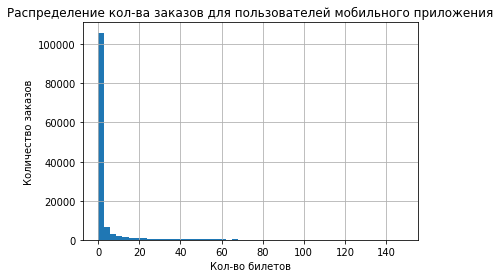

count    127066.000000
mean          3.780075
std          13.384052
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         148.000000
Name: days_since_prev, dtype: float64

In [78]:
df_mobile.hist(bins=50)
plt.title('Распределение кол-ва заказов для пользователей мобильного приложения')
plt.xlabel('Кол-во билетов')
plt.ylabel('Количество заказов')
plt.show()
display(df_mobile.describe())

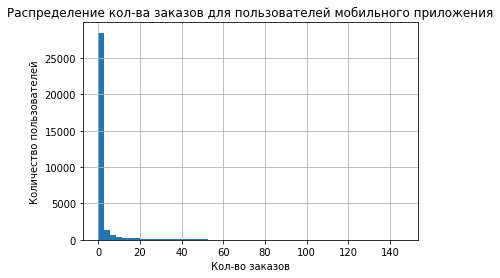

count    32876.000000
mean         3.029383
std         12.104870
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        146.000000
Name: days_since_prev, dtype: float64

In [79]:
df_desktop.hist(bins=50)
plt.title('Распределение кол-ва заказов для пользователей мобильного приложения')
plt.xlabel('Кол-во заказов')
plt.ylabel('Количество пользователей')
plt.show()
display(df_desktop.describe())

In [80]:
display(df_desktop.quantile(0.97))
display(df_mobile.quantile(0.97))

30.0

37.0

Видно что есть хвосты, которые мы уберем, заметно что львиную долю всех значений составляет 0, то есть повторная покупка произведена в этот же самый день, также уберем хвосты по 97 квантилю

In [81]:
df_desktop = df_desktop[df_desktop <= df_desktop.quantile(0.97)]
df_mobile = df_mobile[df_mobile <= df_mobile.quantile(0.97)]

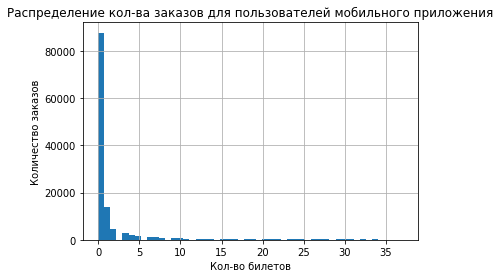

count    123295.000000
mean          1.750850
std           5.058088
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          37.000000
Name: days_since_prev, dtype: float64

In [82]:
df_mobile.hist(bins=50)
plt.title('Распределение кол-ва заказов для пользователей мобильного приложения')
plt.xlabel('Кол-во билетов')
plt.ylabel('Количество заказов')
plt.show()
display(df_mobile.describe())

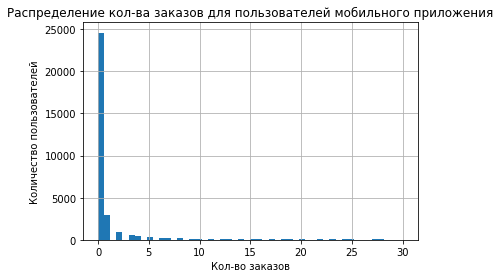

count    31908.000000
mean         1.203053
std          3.819818
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         30.000000
Name: days_since_prev, dtype: float64

In [83]:
df_desktop.hist(bins=50)
plt.title('Распределение кол-ва заказов для пользователей мобильного приложения')
plt.xlabel('Кол-во заказов')
plt.ylabel('Количество пользователей')
plt.show()
display(df_desktop.describe())

Можно заметить, что кол-во пользователей в двух выборках различное и отличается в 4 раза, в сравнение с небольшими значениями среднего выыборок, стандартные отклонения тоже сложно прредставить как равные, распределение для стационарных устройст как уменьшенная версия распределения для мобильного приложения, поэтому приниаю решение провести статистический t-тест Уэлча, модификацию t-теста Стьюдента, которая не требует равенства дисперсий, задаим уровень значимости статистического теста альфа равный 0.05, в целом похожими принципами я руквоводствовался при проверки первой гипотезы

In [84]:
results = st.ttest_ind(df_mobile, df_desktop, equal_var=False, alternative= 'greater') # Укажите подходящий инструмент здесь
p_value = results.pvalue
print_stattest_results(p_value)

Полученное значение p_value=3.9728227088064586e-100 меньше критического уровня alpha=0.05. Принимаем альтернативную гипотезу.


**Выводы**

По результатам статистического теста можно с уверенностью заявить о том, среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств

**Промежуточные выводы**

Пользователи мобильных более активные нежели пользователи стационарныых устройств
PS.В самый последний момент понял что не сравнил пользователей на пересечении категорий устройств, чтоб выборки были независимыми

### Общий вывод и рекомендации

- Была выполнена работа по анализу данных сервиса яндекс афиша по бронированию билетов на различные мероприятия
- На этапе предобработки данных, данные были подготовлены для дальнгейшей работыы, было удалено 3745 строк, что составляет около 1,3% от общего начально кол-ва строк. Также были объееденены датасеты и добавлены новые столбцы для удобства дальнейшей работы
- Был произведен исследовательский анализ:
    - Первая часть быыла посвящена анализу сезонности, был показан тренд повышения активности в осеннем периоде. Рапределение закаказов для возрастного рейтинга меняется в разрезе сезона: в большей степени стало больше заказов для мероприятий рейтингом и меньше с рейтингом 18, в меньшей степени стало больше заказов в категории 12, и меньше с рейтингом 16 и 6 Рапределение закаказов для типа устройств меняется в разрезе типа мероприятий: в большей степени стало больше заказов для мероприятий театр и спорт(закончилося отдых у спортсменов и у артистов гастроли) и стало меньше для категорий концерты, стендапы и другое, другие категории изменнились в меньшей степени Было изменение средней стоимости одного билета в разрезе разных типов мероприятий выставки и стендап - показатель возрос больше чем на 5 процентов, для театра и елок показатель упал на 15 процентов, для концертов эта цифра 12%
    - Втораая часть была посвящена анализу осенней активности пользователей.Видно что дневная активность пользователей растет если сравнивать начало периода с концом, что ткже можно сказать,о тренде для кол-ва заказов каждый день. Можно наблюдать колебания - это колебания дня недели, как можно заметить на последней диаграмме в среднем активность пользователей повышается от пн до пт (пятница пиковая активность ну не удивительно) и спад к вс (все готовятся к работе). Дневная динамика для среднего числа заказов на одного пользователя и Дневная динамика для средней стоимости одного билета плюс минус колеблется в одном диапазоне, в глаза бросаются 2 сенятбря (день знаний официальный 1 сентяюря в вс а вот второго праздник, все собираются в коллективы празднуют и тд, плюс мероприятия, наверное и скидки есть) и 31 хелоуин тоже праздник тоже мероприятия и скидки и спрос, динамика кол-ва заказов тожее подтверждает повышенный спрос в эти дни, 1 октября лидер, но до конуа непонятно что так влияет на динамику в этот день, пока - аномалия
    - Третья часть посвящена выделению топов активности среди организаоторов и регионов. Среди партнеров ожно выделить особо активных их три: Лови билет! 23% от всех мероприятий, Билеты без проблем - 18%, Билеты в руки - 15%, остальные ниже 10 процентов менее интерены, однако среди регионов с большим отрыывом лидируют Каменевский регион 24%, Североярская область 16% - значения нашей метрики на порядок выше сравнивая с конкурентами, оставльные регионы топа проводят от 5 до 1 % от всех уникальных мероприятий
- Был произведен статистический анализ для двух гипотез относительно активности пользователей мобильных и стационарных устройств.
    - Первая гипотеза среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств, оказалась верной. Для статистичсекого теста использовали t-тест Уэлча, а таккже немного обработали данные перред началом его проведения
    - Вторая гипотеза Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств, тоже оказалась верной. Для статистичсекого теста использовали t-тест Уэлча, и таккже немного обработали данные перред началом его проведения
- Общие рекомендации
    - Видно тренд роста актиности пользователей, но хочется посмотреть именно на пользователей как активно происходит их привлечение и удержание
    - Есть тренд в недельной активности пяница пиковый день активности аудитории, нужно это использовать
    - Также видно что с наступлением осени возрасла активность пользователей в сторону семейныых мероприятий, с более низким возрастным рейтиногом типы мероприятия подходящие для посещения всем вместе, делать нужно упор в эти мероприятия, такжее близится новый год елки становятся популярнее, нужно к концу ноября начинать компанию новогоднюю
    - Есть абсолютные лидеры среди регионов, стоит задуматься о более тесной работе в этих регионах ибо аудитория там очень активная и мероприятий немало, а ткаже с активными партнерами.
    - Нужно уделять большее внимание пользоателям мобильных устройств, они болеее активные по результатам тестов. Действительно телефоны всегда под рукой в отличие от пк, пуш уведомления, напоминания дают сввои плоды

